In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
from zillow import features,config,info
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [4]:
hpi=info.get_modelhpi_by_block()[2017]

In [5]:
a=info.get_hpi_by_county()

In [6]:
states=hpi.keys()

In [7]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c
def extrapolate2(s):
    fitting_parameters, covariance = curve_fit(exponential_fit, range(len(s)), s,maxfev=1000)
    a, b, c = fitting_parameters
    fitted = [exponential_fit(u, a, b, c) for u in range(10)]
    return fitted
def extrapolate3(s):
    xi,yi= range(len(s)), s
    s=UnivariateSpline(xi, yi, k=1,s=100)
    return s(range(10))
extrapolate=extrapolate3

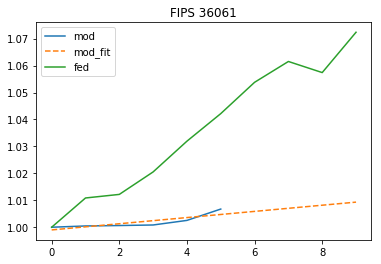

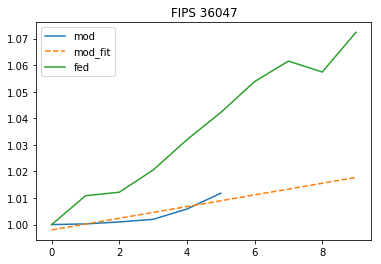

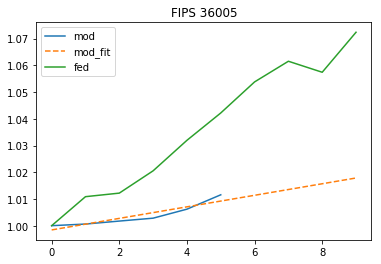

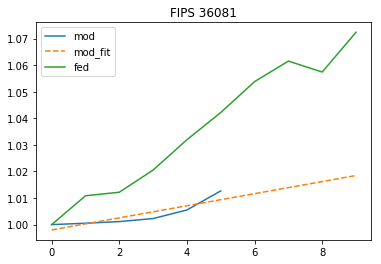

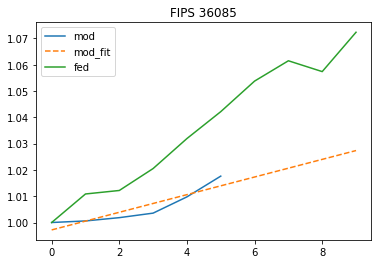

NameError: name 'safd' is not defined

In [9]:
for state in states:
    state='36'
    hpistate=hpi[state]
    names=hpistate[201701].keys()
    names = [u for u in names if len(u)==5]
    for name in names:
        months=[201701, 201702, 201703, 201704, 201705, 201706]
        s=[hpistate[m][name] for m in months]
        fitted=extrapolate(s)
        fed=[ a[name][u] for u in [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710]]
        fed = np.array(fed)/fed[0]
        plt.plot(s)
        plt.plot(fitted,'--')
        plt.plot(fed)
        plt.legend(['mod','mod_fit','fed'])  
        plt.title("FIPS "+name)
        plt.show()
    safd